In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et
from netCDF4 import date2index
from datetime import datetime

In [2]:
ds = xr.open_dataset('C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202201-202212.nc')

In [3]:
ds

<xarray.Dataset> Size: 19MB
Dimensions:    (lat: 1300, lon: 3600)
Dimensions without coordinates: lat, lon
Data variables:
    PM25       (lat, lon) float32 19MB ...
    latitude   (lat) float32 5kB ...
    longitude  (lon) float32 14kB ...
Attributes:
    TITLE:            Convolutional Neural Network Annual PM2.5 Estimation ov...
    CONTACT:          SIYUAN SHEN <s.siyuan@wustl.edu>
    LAT_DELTA:        0.1
    LON_DELTA:        0.1
    SPATIALCOVERAGE:  GL
    TIMECOVERAGE:     2022

In [4]:
nc = Dataset('C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202201-202212.nc','r')
for i in nc.variables:
    print(i, nc.variables[i].units, nc.variables[i].shape)

PM25 ug/m3 (1300, 3600)
latitude degrees north (1300,)
longitude degrees east (3600,)


In [5]:
lat = ds.latitude
lon = ds.longitude

In [6]:
lat

<xarray.DataArray 'latitude' (lat: 1300)> Size: 5kB
[1300 values with dtype=float32]
Dimensions without coordinates: lat
Attributes:
    units:          degrees north
    standard_name:  latitude
    long_name:      latitude

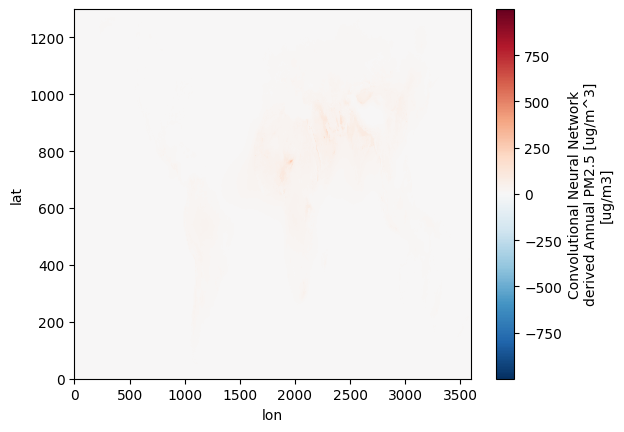

In [7]:
ds.PM25[:].plot()

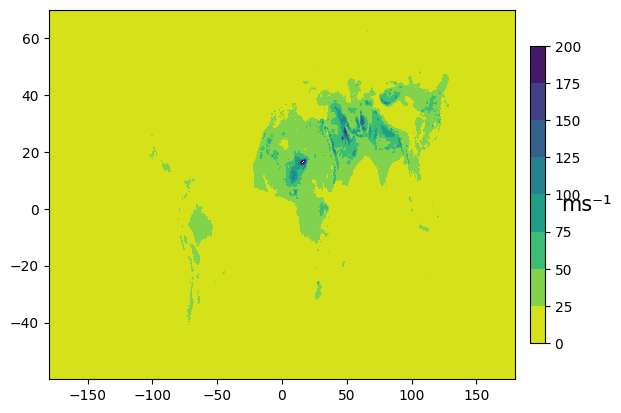

In [28]:
wind_u = ds.PM25[:,:]
wind_u_masked = np.ma.masked_outside(wind_u, 00, 200)
ccf = plt.contourf(lon,lat,wind_u_masked,cmap='viridis_r')
cb = plt.colorbar(ccf,fraction = 0.03,pad= 0.03)
cb.set_label('ms\u207b\u00b9',fontsize=15,rotation=0)
plt.show()

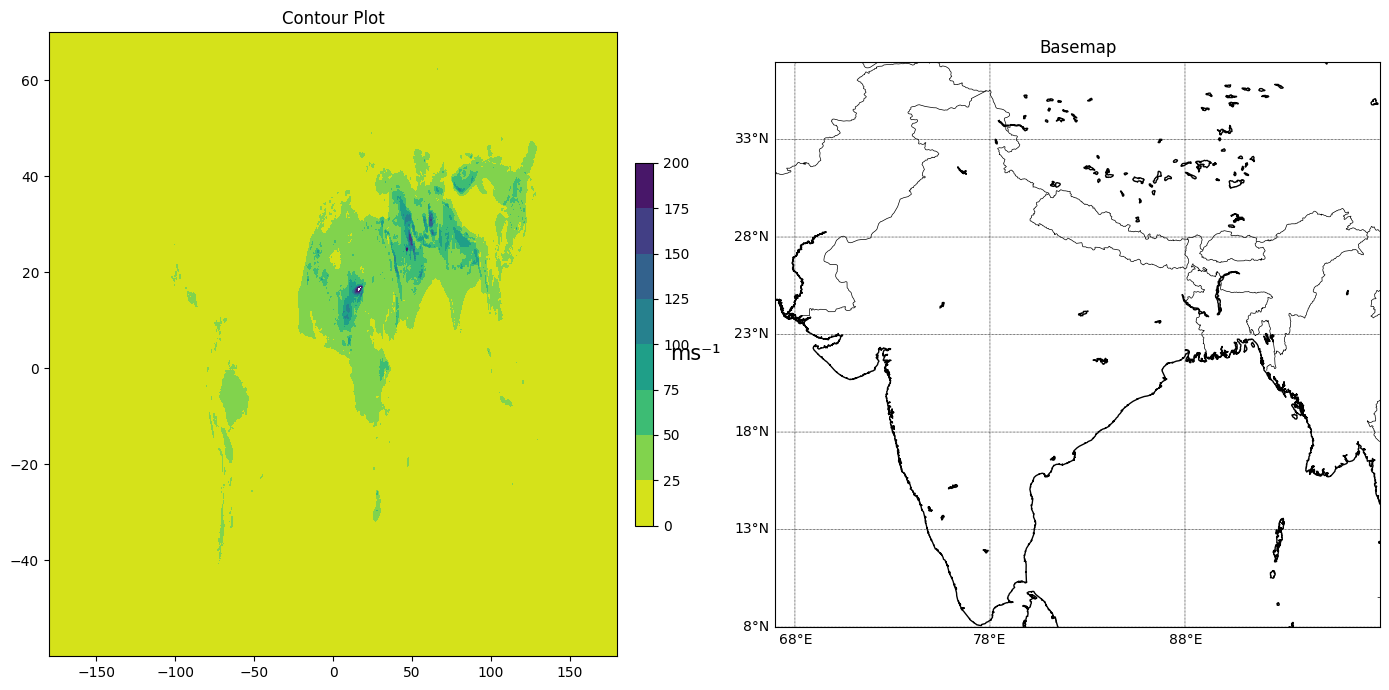

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Assuming 'ds' is your dataset and 'lon' and 'lat' are your longitude and latitude arrays

# Mask the wind_u values outside the range 0 to 200
wind_u = ds.PM25[:, :]
wind_u_masked = np.ma.masked_outside(wind_u, 0, 200)

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# First subplot: Contour plot
ccf = ax1.contourf(lon, lat, wind_u_masked, cmap='viridis_r')
cb = fig.colorbar(ccf, ax=ax1, fraction=0.03, pad=0.03)
cb.set_label('ms\u207b\u00b9', fontsize=15, rotation=0)
ax1.set_title('Contour Plot')

# Second subplot: Basemap plot
m = Basemap(projection='cyl', llcrnrlon=67, llcrnrlat=8, urcrnrlon=98, urcrnrlat=37, resolution='i', ax=ax2)
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(8, 37 + 0.6, 5)
m.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0.5)
meridians = np.arange(68, 98, 10)
m.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0.5)
ax2.set_title('Basemap')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


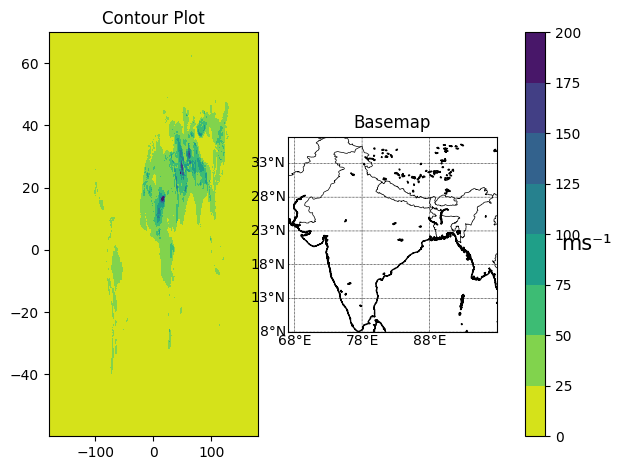

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Assuming 'ds' is your dataset and 'lon' and 'lat' are your longitude and latitude arrays

# Mask the wind_u values outside the range 0 to 200
wind_u = ds.PM25[:, :]
wind_u_masked = np.ma.masked_outside(wind_u, 0, 200)

# Create a new set of axes that share the same figure space as the current axes
ax = plt.gca()
ax_divider = make_axes_locatable(ax)
ax2 = ax_divider.append_axes("right", size="100%", pad=0.3)

# Contour plot on the main axes
ccf = ax.contourf(lon, lat, wind_u_masked, cmap='viridis_r')
cb = plt.colorbar(ccf, ax=ax)
cb.set_label('ms\u207b\u00b9', fontsize=15, rotation=0)
ax.set_title('Contour Plot')

# Basemap plot on the new set of axes
m = Basemap(projection='cyl', llcrnrlon=67, llcrnrlat=8, urcrnrlon=98, urcrnrlat=37, resolution='i', ax=ax2)
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(8, 37 + 0.6, 5)
m.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0.5)
meridians = np.arange(68, 98, 10)
m.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0.5)
ax2.set_title('Basemap')

# Show the plot
plt.tight_layout()
plt.show()


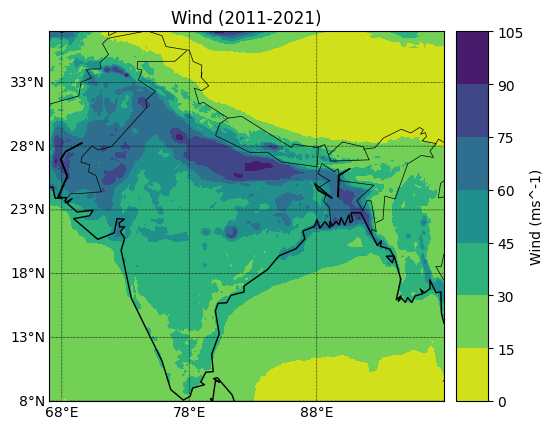

In [32]:
wind_v = ds.PM25[:,:]
wind_u_masked = np.ma.masked_outside(wind_u, 0, 200)
plt.figure()
plt.rcParams["figure.figsize"] = (16,8)
map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98)
map.drawcoastlines(color="black")
map.drawcountries()
lons,lats = np.meshgrid(ds.variables['longitude'][:], ds.variables['latitude'][:])
parallels = np.arange(8,37+.6,5)
map.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(68,98,10)
map.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)
x,y = map(lons, lats)
rain_plot = map.contourf(x, y, wind_u_masked, cmap=plt.cm.viridis_r)
cb = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend = 'both')
cb.set_label(u"Wind (ms^-1)")
plt.title("Wind (2011-2021)")
plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=10)
plt.show()

In [33]:
df = xr.open_dataset('C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202212-202212.nc')

In [34]:
df

<xarray.Dataset> Size: 19MB
Dimensions:    (lat: 1300, lon: 3600)
Dimensions without coordinates: lat, lon
Data variables:
    PM25       (lat, lon) float32 19MB ...
    latitude   (lat) float32 5kB ...
    longitude  (lon) float32 14kB ...
Attributes:
    TITLE:            Convolutional Neural Network Monthly PM2.5 Estimation o...
    CONTACT:          SIYUAN SHEN <s.siyuan@wustl.edu>
    LAT_DELTA:        0.1
    LON_DELTA:        0.1
    SPATIALCOVERAGE:  GL
    TIMECOVERAGE:     202212

In [6]:
df = pd.read_excel("C:\\Users\\Support\\Downloads\\cf_assim_pm25_20231001_28.5x77.25.xlsx")
df

time        PM25               w_time      U10M  \
0     2023-10-01T00:30:00  161.638535  2023-10-01T00:30:00  0.187578   
1     2023-10-01T01:30:00  176.137711  2023-10-01T01:30:00  0.093369   
2     2023-10-01T02:30:00  195.638550  2023-10-01T02:30:00  0.057407   
3     2023-10-01T03:30:00  207.389694  2023-10-01T03:30:00  0.055527   
4     2023-10-01T04:30:00  117.892685  2023-10-01T04:30:00  0.202305   
...                   ...         ...                  ...       ...   
2179  2023-12-30T19:30:00  352.621216                  NaN       NaN   
2180  2023-12-30T20:30:00  376.622345                  NaN       NaN   
2181  2023-12-30T21:30:00  399.626312                  NaN       NaN   
2182  2023-12-30T22:30:00  418.132782                  NaN       NaN   
2183  2023-12-30T23:30:00  429.620575                  NaN       NaN   

          V10M  total_wind  wind_direction iso_code  
0    -2.874372    2.880486       -1.505630      IND  
1    -2.625006    2.626666       -1.535242      IND  
2    -2.990679    2.991230       -1.551603      IND  
3    -2.407964    2.408604       -1.547741      IND  
4    -3.093308    3.099916       -1.505489      IND  
...        ...         ...             ...      ...  
2179       NaN         NaN             NaN      IND  
2180       NaN         NaN             NaN      IND  
2181       NaN         NaN             NaN      IND  
2182       NaN         NaN             NaN      IND  
2183       NaN         NaN             NaN      IND  

[2184 rows x 8 columns]

In [7]:
# Product	PM2.5	
# Chem Units	ug/m3	
# Wind Speed Units	m/s	
# Wind Direction Units	Radians	
# Initial Time	2023-10-01T00:30:00	

#the monthly data of delhi

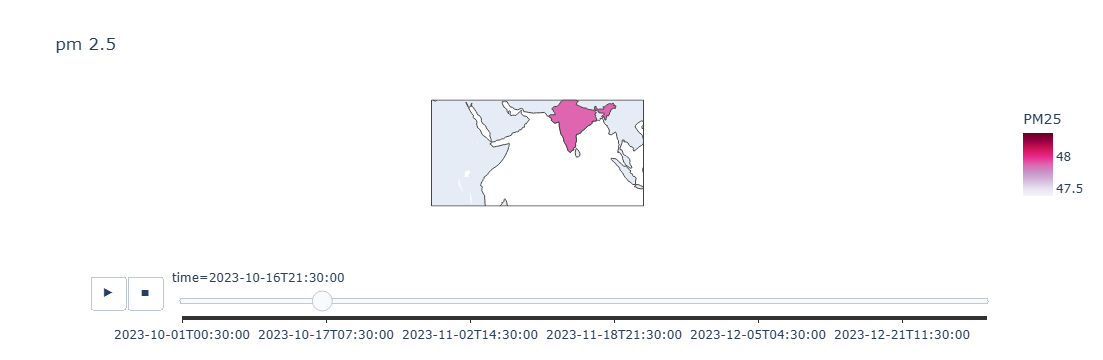

In [8]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame 'df' with columns: 'iso_code', 'new_cases', 'location', and 'date'
fig = px.choropleth(df, locations="iso_code",color="PM25",
                     animation_frame="time", title="pm 2.5",
                     color_continuous_scale=px.colors.sequential.PuRd)
fig.show()

In [43]:
dr = xr.open_dataset("C:\\Users\\Support\\Downloads\\GEOS.fp.asm.inst1_2d_lfo_Nx.20231001_0000.V01.nc4")
dr

<xarray.Dataset> Size: 17MB
Dimensions:   (lon: 1152, lat: 721, time: 1)
Coordinates:
  * lon       (lon) float64 9kB -180.0 -179.7 -179.4 ... 179.1 179.4 179.7
  * lat       (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time      (time) datetime64[ns] 8B 2023-10-01
Data variables:
    HLML      (time, lat, lon) float32 3MB ...
    PS        (time, lat, lon) float32 3MB ...
    QLML      (time, lat, lon) float32 3MB ...
    SPEEDLML  (time, lat, lon) float32 3MB ...
    TLML      (time, lat, lon) float32 3MB ...
    TAITIME   (time) float64 8B ...
Attributes: (12/28)
    Contact:               http://gmao.gsfc.nasa.gov
    Institution:           NASA Global Modeling and Assimilation Office
    History:               Original file generated: Sun Oct  1 09:59:16 2023 GMT
    Filename:              GEOS.fp.asm.inst1_2d_lfo_Nx.20231001_0000.V01.nc4
    Comment:               GMAO filename: f5295_fp.inst1_2d_lfo_Nx.20231001_0...
    Source:                GEOSadas-5_29_5_OPS experiment_id: f5295_fp
    ...                    ...
    NorthernmostLatitude:  90.0
    WesternmostLongitude:  -180.0
    EasternmostLongitude:  179.6875
    LatitudeResolution:    0.25
    LongitudeResolution:   0.3125
    DataResolution:        0.25 x 0.3125

C:\Users\Support\AppData\Roaming\Python\Python311\site-packages\matplotlib\animation.py:892: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.

MovieWriter imagemagick unavailable; using Pillow instead.
C:\Users\Support\AppData\Roaming\Python\Python311\site-packages\xarray\backends\plugins.py:159: RuntimeWarning:

'netcdf4' fails while guessing

C:\Users\Support\AppData\Roaming\Python\Python311\site-packages\xarray\backends\plugins.py:159: RuntimeWarning:

'scipy' fails while guessing

C:\Users\Support\AppData\Roaming\Python\Python311\site-packages\xarray\backends\plugins.py:168: RuntimeWarning:

'netcdf4' fails while guessing

C:\Users\Support\AppData\Roaming\Python\Python311\site-packages\xarray\backends\plugins.py:168: RuntimeWarning:

'h5netcdf' fails while guessing

C:\Users\Support\App

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'gini', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

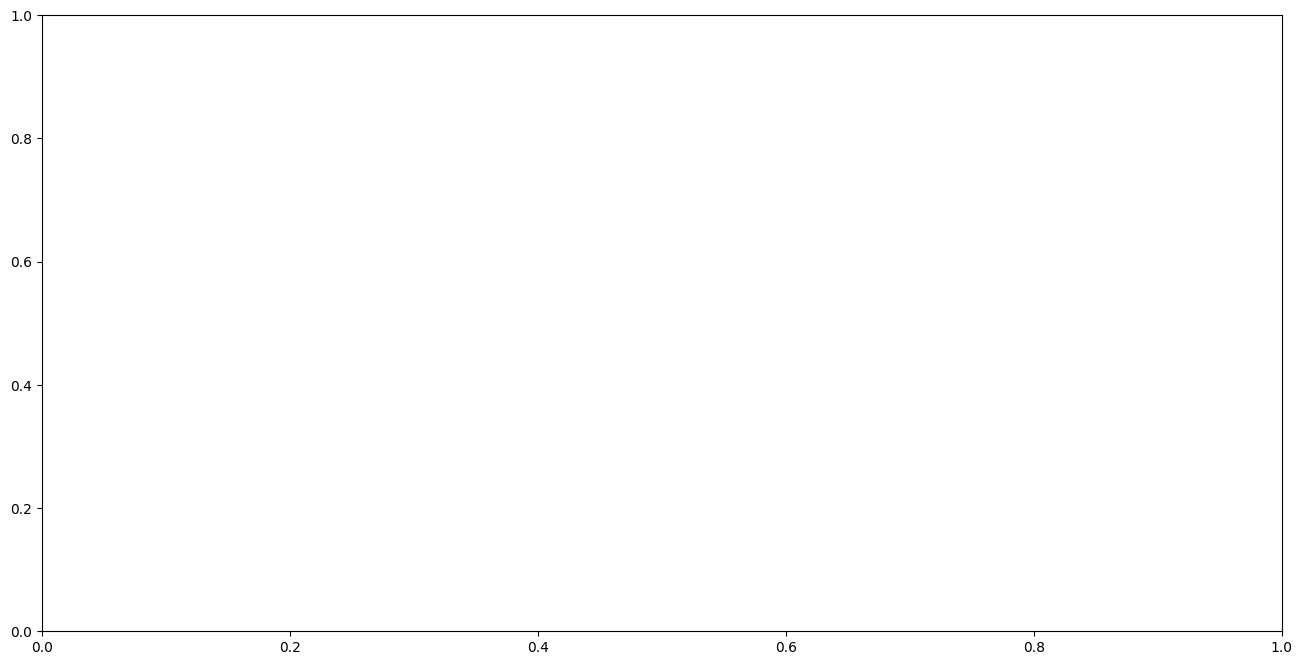

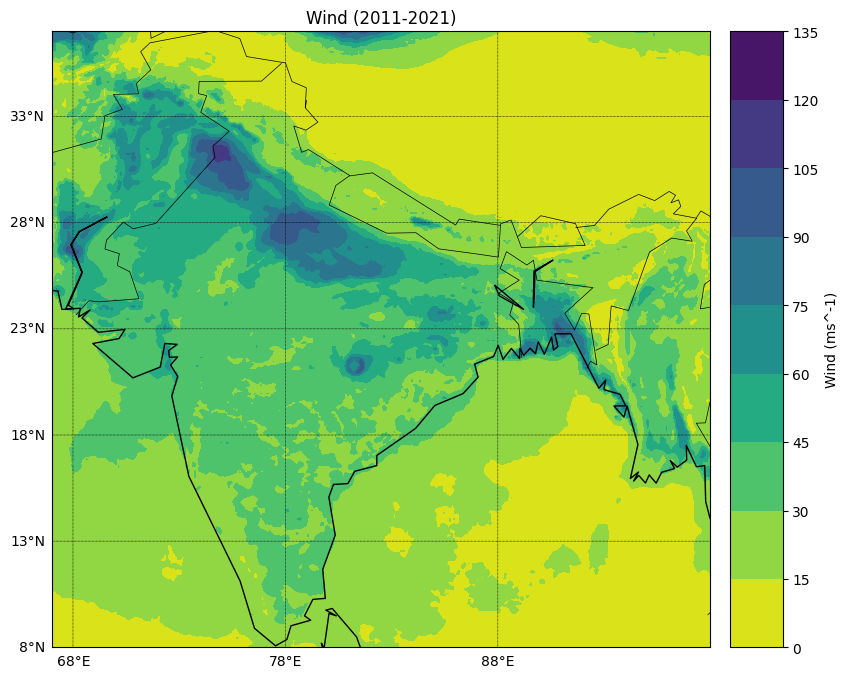

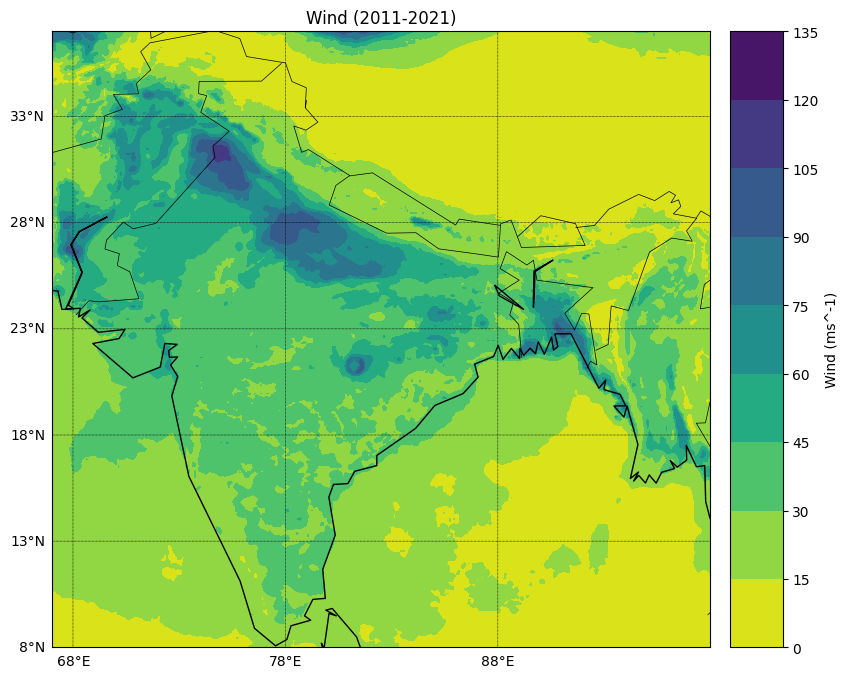

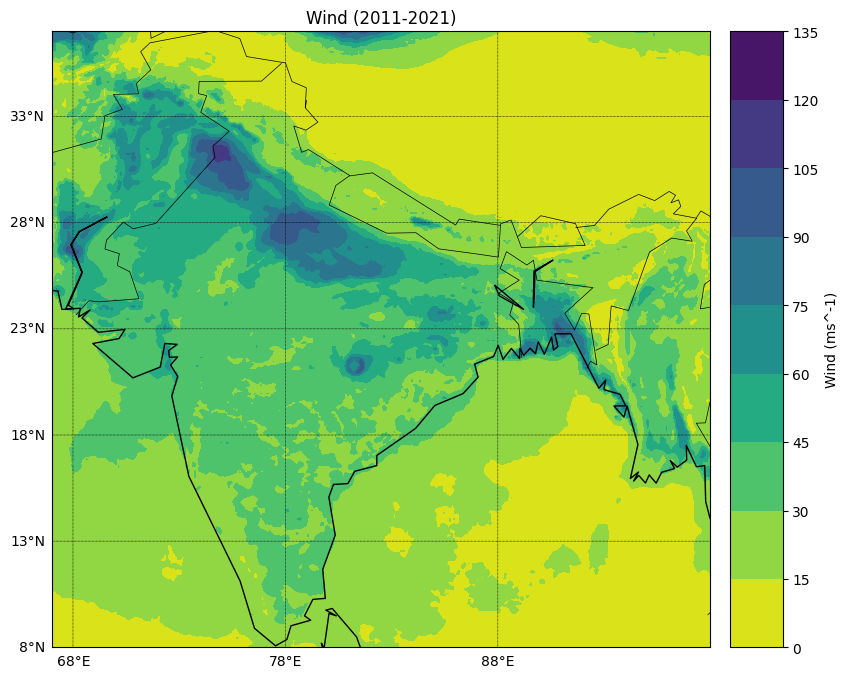

In [18]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import netCDF4 as nc
import numpy as np

# Example function to read and plot nc4 data
def plot_nc4_data(ax, file_path):
    ds = xr.open_dataset(file_path)
    
    # Assuming the dataset contains 'latitude', 'longitude', and 'data' variables
    wind_v = ds.PM25[:,:]
    wind_u_masked = np.ma.masked_outside(wind_v, 0, 200)

    plt.figure()
    plt.rcParams["figure.figsize"] = (16,8)
    map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98)
    map.drawcoastlines(color="black")
    map.drawcountries()
    lons,lats = np.meshgrid(ds.variables['longitude'][:], ds.variables['latitude'][:])
    parallels = np.arange(8,37+.6,5)
    map.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
    meridians = np.arange(68,98,10)
    map.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)
    x,y = map(lons, lats)
    rain_plot = map.contourf(x, y, wind_u_masked, cmap=plt.cm.viridis_r)
    cb = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend = 'both')
    cb.set_label(u"Wind (ms^-1)")
    plt.title("Wind (2011-2021)")
    plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=10)
    
    # lat = dataset.variables['latitude'][:]
    # lon = dataset.variables['longitude'][:]
    # data = dataset.variables['data'][:]
    
    # # Creating a meshgrid for plotting
    # lon, lat = np.meshgrid(lon, lat)
    
    # # Clear the current plot
    ax.clear()
    
    # # Plot the data
    # c = ax.pcolormesh(lon, lat, data, shading='auto')
    # plt.colorbar(c, ax=ax)
    # ax.set_title(f'Data from {file_path}')



# List of nc4 file paths
nc4_files = ["C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202210-202210.nc", "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202211-202211.nc" "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202212-202212.nc"]  # Add your file paths here

# Create a figure and axis
fig, ax = plt.subplots()

# Function to update the plot for animation
def update(frame):
    plot_nc4_data(ax, nc4_files[frame])

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(nc4_files), repeat=False)

# Save the animation as a video file or GIF
#ani.save('nc4_animation.mp4', writer='ffmpeg', fps=1)  # Save as MP4
ani.save('nc4_animation.gif', writer='imagemagick', fps=1)  # Save as GIF

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


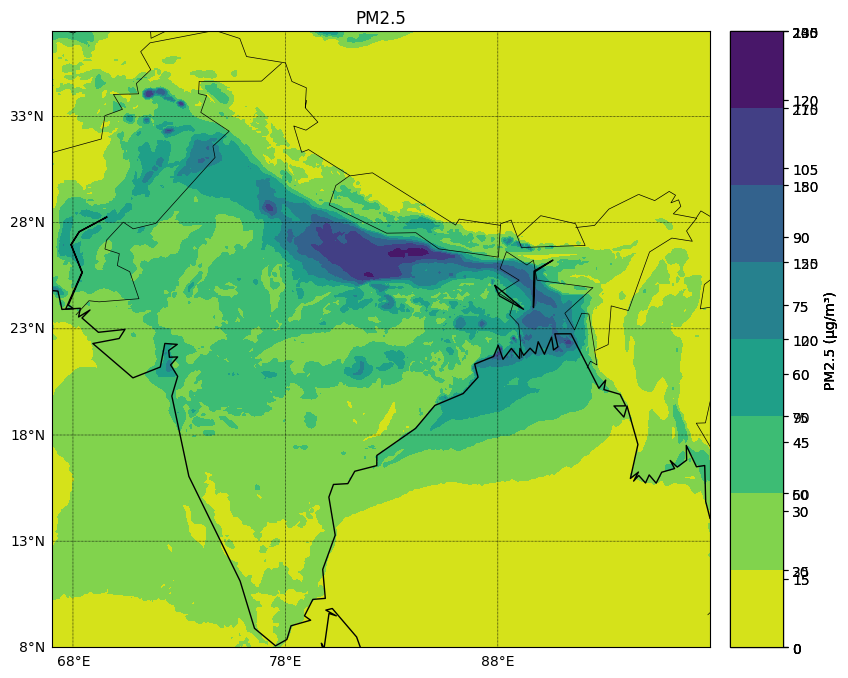

In [27]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap
import xarray as xr

# Function to read and plot nc4 data
def plot_nc4_data(ax, file_path):
    ds = xr.open_dataset(file_path)
    
    # Assuming the dataset contains 'latitude', 'longitude', and 'PM25' variables
    wind_v = ds['PM25'].values
    wind_u_masked = np.ma.masked_outside(wind_v, 0, 300)

    # Clear the current plot
    ax.clear()

    map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98, ax=ax)
    map.drawcoastlines(color="black")
    map.drawcountries()
    lons, lats = np.meshgrid(ds['longitude'].values, ds['latitude'].values)
    parallels = np.arange(8, 37.6, 5)
    map.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
    meridians = np.arange(68, 98, 10)
    map.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)
    x, y = map(lons, lats)
    rain_plot = map.contourf(x, y, wind_u_masked, cmap=plt.cm.viridis_r)
    cb = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend='both')
    cb.set_label("PM2.5 (µg/m³)")
    ax.set_title("PM2.5")
    ax.annotate('Data - CRU TS v4.02', (-178, -88), fontsize=10)

# List of nc4 file paths
nc4_files = [
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202210-202210.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202211-202211.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202212-202212.nc"
]

# Create a figure and axis
fig, ax = plt.subplots()

# Function to update the plot for animation
def update(frame):
    plot_nc4_data(ax, nc4_files[frame])

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(nc4_files), repeat=False)

# Save the animation as a video file or GIF
#ani.save('nc4_animation.mp4', writer='ffmpeg', fps=1)  # Save as MP4
ani.save('nc4_animation_1.gif', writer='imagemagick', fps=1)  # Save as GIF

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


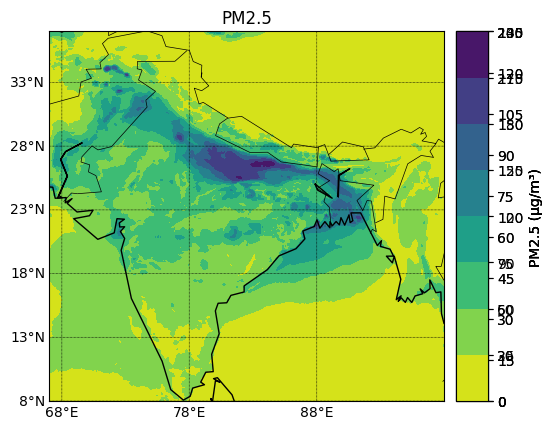

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap
import xarray as xr

# Function to read and plot nc4 data
def plot_nc4_data(ax, file_path, cbar=None):
    ds = xr.open_dataset(file_path)
    
    # Assuming the dataset contains 'latitude', 'longitude', and 'PM25' variables
    wind_v = ds['PM25'].values
    wind_u_masked = np.ma.masked_outside(wind_v, 0, 300)

    # Clear the current plot
    ax.clear()

    map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98, ax=ax)
    map.drawcoastlines(color="black")
    map.drawcountries()
    lons, lats = np.meshgrid(ds['longitude'].values, ds['latitude'].values)
    parallels = np.arange(8, 37.6, 5)
    map.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
    meridians = np.arange(68, 98, 10)
    map.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)
    x, y = map(lons, lats)
    rain_plot = map.contourf(x, y, wind_u_masked, cmap=plt.cm.viridis_r)
    
    # Remove the old colorbar if it exists
    if cbar:
        cbar.remove()
    
    # Create a new colorbar
    cbar = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend='both')
    cbar.set_label("PM2.5 (µg/m³)")
    ax.set_title("PM2.5")
    ax.annotate('Data - CRU TS v4.02', (-178, -88), fontsize=10)


# List of nc4 file paths
nc4_files = [
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202210-202210.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202211-202211.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202212-202212.nc"
]

# Create a figure and axis
fig, ax = plt.subplots()

# Initial colorbar is set to None
cbar = None

# Function to update the plot for animation
def update(frame):
    global cbar
    cbar = plot_nc4_data(ax, nc4_files[frame], cbar)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(nc4_files), repeat=False)

# Save the animation as a video file or GIF
ani.save('winter_monthly.gif', writer='imagemagick', fps=1)  # Save as GIF
# ani.save('nc4_animation.mp4', writer='ffmpeg', fps=1)  # Save as MP4

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


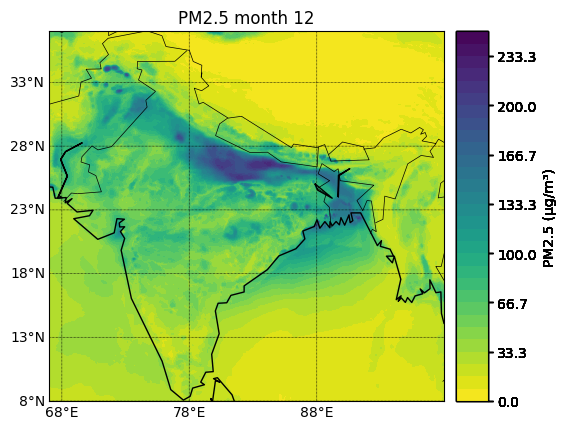

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from mpl_toolkits.basemap import Basemap
import xarray as xr


t =0
# Function to read and plot nc4 data
def plot_nc4_data(ax, file_path, cbar=None):
    ds = xr.open_dataset(file_path)
    
    # Assuming the dataset contains 'latitude', 'longitude', and 'PM25' variables
    wind_v = ds['PM25'].values
    wind_u_masked = np.ma.masked_outside(wind_v, 0, 250)

    # Clear the current plot
    ax.clear()

    map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98, ax=ax)
    map.drawcoastlines(color="black")
    map.drawcountries()
    lons, lats = np.meshgrid(ds['longitude'].values, ds['latitude'].values)
    parallels = np.arange(8, 37.6, 5)
    map.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
    meridians = np.arange(68, 98, 10)
    map.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)
    x, y = map(lons, lats)
    rain_plot = map.contourf(x, y, wind_u_masked, cmap=plt.cm.viridis_r, levels=np.linspace(0, 250, 31))

    # Remove the old colorbar if it exists
    if cbar:
        cbar.remove()
    
    # Create a new colorbar
    cbar = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend='both')
    cbar.set_label("PM2.5 (µg/m³)")
    global t
    ax.set_title(f"PM2.5 month {t}")
    t=t+1
    ax.annotate('Data - CRU TS v4.02', (-178, -88), fontsize=10)
    
    

# List of nc4 file paths
nc4_files = [
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202201-202201.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202202-202202.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202203-202203.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202204-202204.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202205-202205.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202206-202206.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202207-202207.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202208-202208.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202209-202209.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202210-202210.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202211-202211.nc",
    "C:\\Users\\Support\\Downloads\\V6GL02.0p10.CNNPM25.Global.202212-202212.nc"
]

# Create a figure and axis
fig, ax = plt.subplots()

# Initial colorbar is set to None
cbar = None

# Function to update the plot for animation
def update(frame):
    global cbar
    cbar = plot_nc4_data(ax, nc4_files[frame], cbar)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(nc4_files), repeat=False)

# Save the animation as a video file or GIF
ani.save('mean_monthly.gif', writer='imagemagick', fps=1)  # Save as GIF
# ani.save('nc4_animation.mp4', writer='ffmpeg', fps=1)  # Save as MP4

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x0000018730CDC9A0> (for post_execute):


MemoryError: Unable to allocate 2.41 GiB for an array with shape (18000, 36000) and data type float32

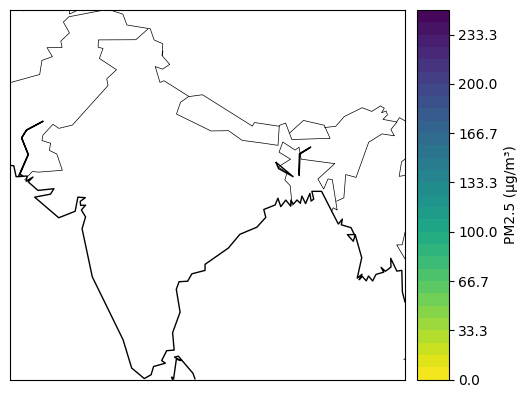

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from mpl_toolkits.basemap import Basemap
import xarray as xr


t =0
# Function to read and plot nc4 data
def plot_nc4_data(ax, file_path, cbar=None):
    ds = xr.open_dataset(file_path)
    
    # Assuming the dataset contains 'latitude', 'longitude', and 'PM25' variables
    wind_v = ds.variables['PM2.5'][:]
    wind_u_masked = np.ma.masked_outside(wind_v, 0, 250)

    # Clear the current plot
    ax.clear()

    map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98, ax=ax)
    map.drawcoastlines(color="black")
    map.drawcountries()
    lons, lats = np.meshgrid(ds['lon'].values, ds['lat'].values)
    parallels = np.arange(8, 37.6, 5)
    map.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
    meridians = np.arange(68, 98, 10)
    map.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)
    x, y = map(lons, lats)
    rain_plot = map.contourf(x, y, wind_u_masked, cmap=plt.cm.viridis_r, levels=np.linspace(0, 250, 31))

    # Remove the old colorbar if it exists
    if cbar:
        cbar.remove()
    
    # Create a new colorbar
    cbar = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend='both')
    cbar.set_label("PM2.5 (µg/m³)")
    ax.set_title("PM2.5")
    # global t
    # ax.set_title(f"PM2.5 day {t}")
    #t=t+1
    ax.annotate('Data - CRU TS v4.02', (-178, -88), fontsize=10)
    
    
number_strings = [f"{i:02}" for i in range(1, 31)]
# List of nc4 file paths
nc4_files = []
for i in range(0,30):
    nc4_files.append(f"C:\\Users\\Support\\Downloads\\GHAP_PM2.5_D1K_202211_V1\\GHAP_PM2.5_D1K_202211{number_strings[i]}_V1.nc")

# Create a figure and axis
fig, ax = plt.subplots()

# Initial colorbar is set to None
cbar = None

# Function to update the plot for animation
def update(frame):
    global cbar
    cbar = plot_nc4_data(ax, nc4_files[frame], cbar)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(nc4_files), repeat=False)

# Save the animation as a video file or GIF
ani.save('daily_nov.gif', writer='imagemagick', fps=1)  # Save as GIF
# ani.save('nc4_animation.mp4', writer='ffmpeg', fps=1)  # Save as MP4

plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import numpy as np
# from mpl_toolkits.basemap import Basemap
# import xarray as xr


# t =0
# # Function to read and plot nc4 data
# def plot_nc4_data(ax, file_path, cbar=None):
#     ds = xr.open_dataset(file_path)
    
#     # Assuming the dataset contains 'latitude', 'longitude', and 'PM25' variables
#     wind_v = ds.variables['PM2.5'][:]
#     wind_u_masked = np.ma.masked_outside(wind_v, 0, 250)

#     # Clear the current plot
#     ax.clear()

#     map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98, ax=ax)
#     map.drawcoastlines(color="black")
#     map.drawcountries()
#     lons, lats = np.meshgrid(ds['lon'].values, ds['lat'].values)
#     parallels = np.arange(8, 37.6, 5)
#     map.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
#     meridians = np.arange(68, 98, 10)
#     map.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)
#     x, y = map(lons, lats)
#     rain_plot = map.contourf(x, y, wind_u_masked, cmap=plt.cm.viridis_r, levels=np.linspace(0, 250, 31))

#     # Remove the old colorbar if it exists
#     if cbar:
#         cbar.remove()
    
#     # Create a new colorbar
#     cbar = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend='both')
#     cbar.set_label("PM2.5 (µg/m³)")
#     ax.set_title("PM2.5")
#     ax.annotate('Data - CRU TS v4.02', (-178, -88), fontsize=10)
    
    

# # List of nc4 file paths
# nc4_files = ["C:\\Users\\Support\\Downloads\\GHAP_PM2.5_D1K_202211_V1\\GHAP_PM2.5_D1K_20221101_V1.nc"]

# # Create a figure and axis
# fig, ax = plt.subplots()

# # Initial colorbar is set to None
# cbar = None

# # Function to update the plot for animation
# def update(frame):
#     global cbar
#     cbar = plot_nc4_data(ax, nc4_files[frame], cbar)

# # Create the animation
# ani = animation.FuncAnimation(fig, update, frames=len(nc4_files), repeat=False)

# # Save the animation as a video file or GIF
# ani.save('mean_monthly.gif', writer='imagemagick', fps=1)  # Save as GIF
# # ani.save('nc4_animation.mp4', writer='ffmpeg', fps=1)  # Save as MP4

# plt.show()


In [2]:
ds = xr.open_dataset("C:\\Users\\Support\\Downloads\\GHAP_PM2.5_D1K_202211_V1\\GHAP_PM2.5_D1K_20221101_V1.nc")
ds

<xarray.Dataset> Size: 3GB
Dimensions:  (lat: 18000, lon: 36000)
Coordinates:
  * lat      (lat) float32 72kB 90.0 89.99 89.98 89.97 ... -89.97 -89.98 -89.99
  * lon      (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    PM2.5    (lat, lon) float32 3GB ...

In [4]:
india_lat_min, india_lat_max = 6, 38
india_lon_min, india_lon_max = 68, 97.5

ds_india = ds.sel(lat=slice(india_lat_max, india_lat_min), lon=slice(india_lon_min, india_lon_max))
ds_india

<xarray.Dataset> Size: 38MB
Dimensions:  (lat: 3201, lon: 2951)
Coordinates:
  * lat      (lat) float32 13kB 38.0 37.99 37.98 37.97 ... 6.03 6.02 6.01 6.0
  * lon      (lon) float32 12kB 68.0 68.01 68.02 68.03 ... 97.48 97.49 97.5
Data variables:
    PM2.5    (lat, lon) float32 38MB ...

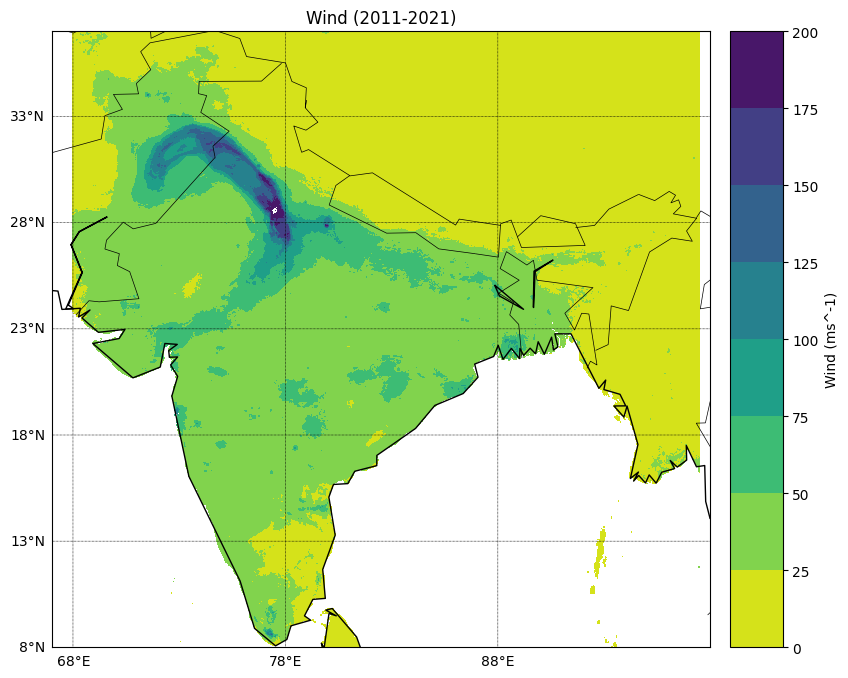

In [6]:
wind_v = ds_india.variables['PM2.5']
wind_u_masked = np.ma.masked_outside(wind_v, 0, 200)
plt.figure()
plt.rcParams["figure.figsize"] = (16,8)
map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98)
map.drawcoastlines(color="black")
map.drawcountries()
lons,lats = np.meshgrid(ds_india['lon'].values, ds_india['lat'].values)
parallels = np.arange(8,37+.6,5)
map.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(68,98,10)
map.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)
x,y = map(lons, lats)
rain_plot = map.contourf(x, y, wind_u_masked, cmap=plt.cm.viridis_r)
cb = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend = 'both')
cb.set_label(u"Wind (ms^-1)")
plt.title("Wind (2011-2021)")
plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=10)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


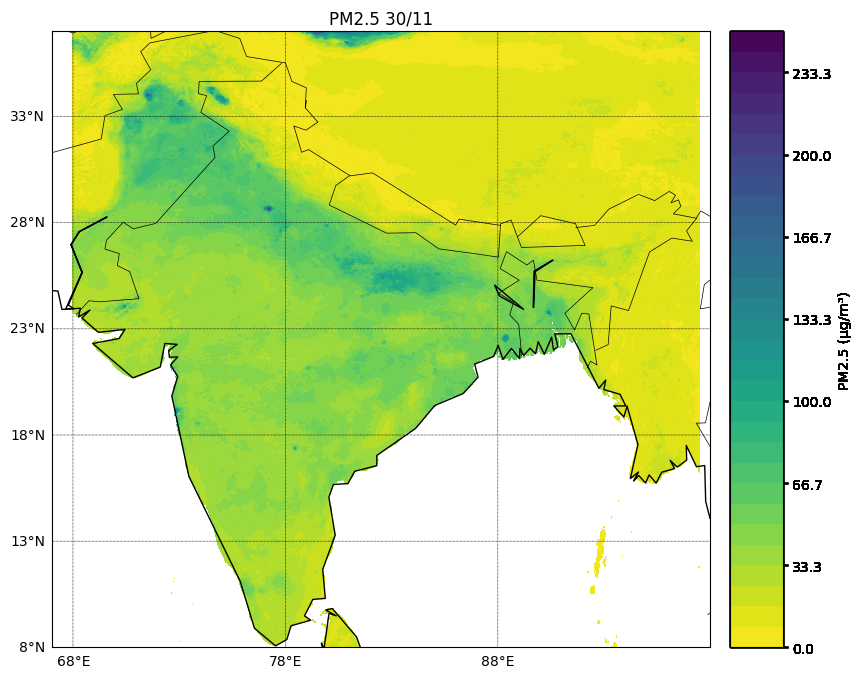

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from mpl_toolkits.basemap import Basemap
import xarray as xr


t =0
# Function to read and plot nc4 data
def plot_nc4_data(ax, file_path, cbar=None):
    ds = xr.open_dataset(file_path)
    india_lat_min, india_lat_max = 6, 38
    india_lon_min, india_lon_max = 68, 97.5
    
    ds_india = ds.sel(lat=slice(india_lat_max, india_lat_min), lon=slice(india_lon_min, india_lon_max))
    # Assuming the dataset contains 'latitude', 'longitude', and 'PM25' variables
    wind_v = ds_india.variables['PM2.5'][:]
    wind_u_masked = np.ma.masked_outside(wind_v, 0, 250)

    # Clear the current plot
    ax.clear()

    map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98, ax=ax)
    map.drawcoastlines(color="black")
    map.drawcountries()
    lons, lats = np.meshgrid(ds_india['lon'].values, ds_india['lat'].values)
    parallels = np.arange(8, 37.6, 5)
    map.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
    meridians = np.arange(68, 98, 10)
    map.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)
    x, y = map(lons, lats)
    rain_plot = map.contourf(x, y, wind_u_masked, cmap=plt.cm.viridis_r, levels=np.linspace(0, 250, 31))

    # Remove the old colorbar if it exists
    if cbar:
        cbar.remove()
    
    # Create a new colorbar
    cbar = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend='both')
    cbar.set_label("PM2.5 (µg/m³)")
    #ax.set_title("PM2.5")
    global t
    ax.set_title(f"PM2.5 {t}/11")
    t=t+1
    ax.annotate('Data - CRU TS v4.02', (-178, -88), fontsize=10)
    
    
number_strings = [f"{i:02}" for i in range(1, 31)]
# List of nc4 file paths
nc4_files = []
for i in range(0,30):
    nc4_files.append(f"C:\\Users\\Support\\Downloads\\GHAP_PM2.5_D1K_202211_V1\\GHAP_PM2.5_D1K_202211{number_strings[i]}_V1.nc")

# Create a figure and axis
fig, ax = plt.subplots()

# Initial colorbar is set to None
cbar = None

# Function to update the plot for animation
def update(frame):
    global cbar
    cbar = plot_nc4_data(ax, nc4_files[frame], cbar)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(nc4_files), repeat=False)

# Save the animation as a video file or GIF
ani.save('daily_nov.gif', writer='imagemagick', fps=1)  # Save as GIF
# ani.save('nc4_animation.mp4', writer='ffmpeg', fps=1)  # Save as MP4

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


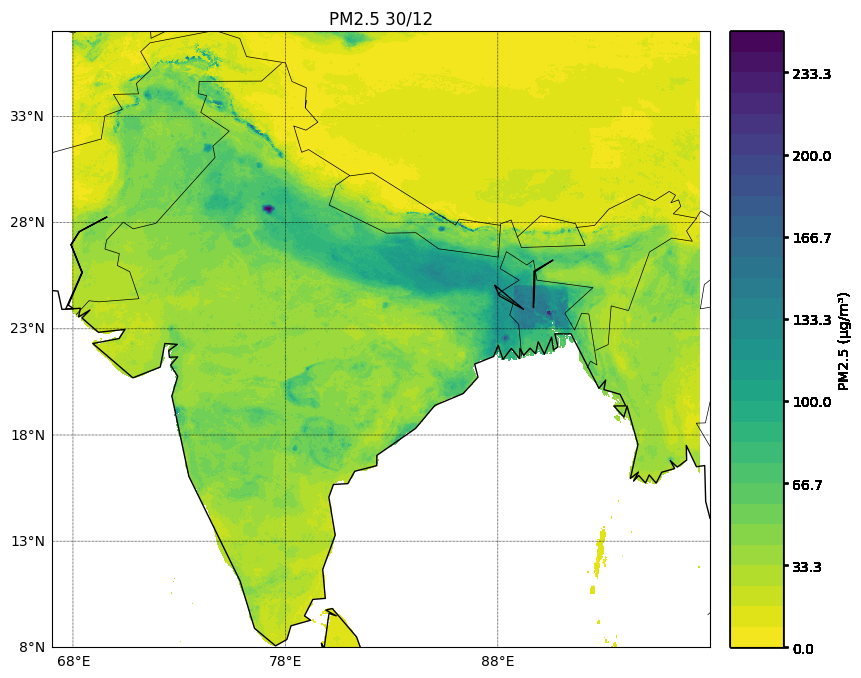

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from mpl_toolkits.basemap import Basemap
import xarray as xr


t =0
# Function to read and plot nc4 data
def plot_nc4_data(ax, file_path, cbar=None):
    ds = xr.open_dataset(file_path)
    india_lat_min, india_lat_max = 6, 38
    india_lon_min, india_lon_max = 68, 97.5
    
    ds_india = ds.sel(lat=slice(india_lat_max, india_lat_min), lon=slice(india_lon_min, india_lon_max))
    # Assuming the dataset contains 'latitude', 'longitude', and 'PM25' variables
    wind_v = ds_india.variables['PM2.5'][:]
    wind_u_masked = np.ma.masked_outside(wind_v, 0, 250)

    # Clear the current plot
    ax.clear()

    map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98, ax=ax)
    map.drawcoastlines(color="black")
    map.drawcountries()
    lons, lats = np.meshgrid(ds_india['lon'].values, ds_india['lat'].values)
    parallels = np.arange(8, 37.6, 5)
    map.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
    meridians = np.arange(68, 98, 10)
    map.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)
    x, y = map(lons, lats)
    rain_plot = map.contourf(x, y, wind_u_masked, cmap=plt.cm.viridis_r, levels=np.linspace(0, 250, 31))

    # Remove the old colorbar if it exists
    if cbar:
        cbar.remove()
    
    # Create a new colorbar
    cbar = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend='both')
    cbar.set_label("PM2.5 (µg/m³)")
    #ax.set_title("PM2.5")
    global t
    ax.set_title(f"PM2.5 {t}/12")
    t=t+1
    ax.annotate('Data - CRU TS v4.02', (-178, -88), fontsize=10)
    
    
number_strings = [f"{i:02}" for i in range(1, 31)]
# List of nc4 file paths
nc4_files = []
for i in range(0,30):
    nc4_files.append(f"C:\\Users\\Support\\Downloads\\GHAP_PM2.5_D1K_202212_V1\\GHAP_PM2.5_D1K_202212{number_strings[i]}_V1.nc")

# Create a figure and axis
fig, ax = plt.subplots()

# Initial colorbar is set to None
cbar = None

# Function to update the plot for animation
def update(frame):
    global cbar
    cbar = plot_nc4_data(ax, nc4_files[frame], cbar)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(nc4_files), repeat=False)

# Save the animation as a video file or GIF
ani.save('daily_dec.gif', writer='imagemagick', fps=1)  # Save as GIF
# ani.save('nc4_animation.mp4', writer='ffmpeg', fps=1)  # Save as MP4

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


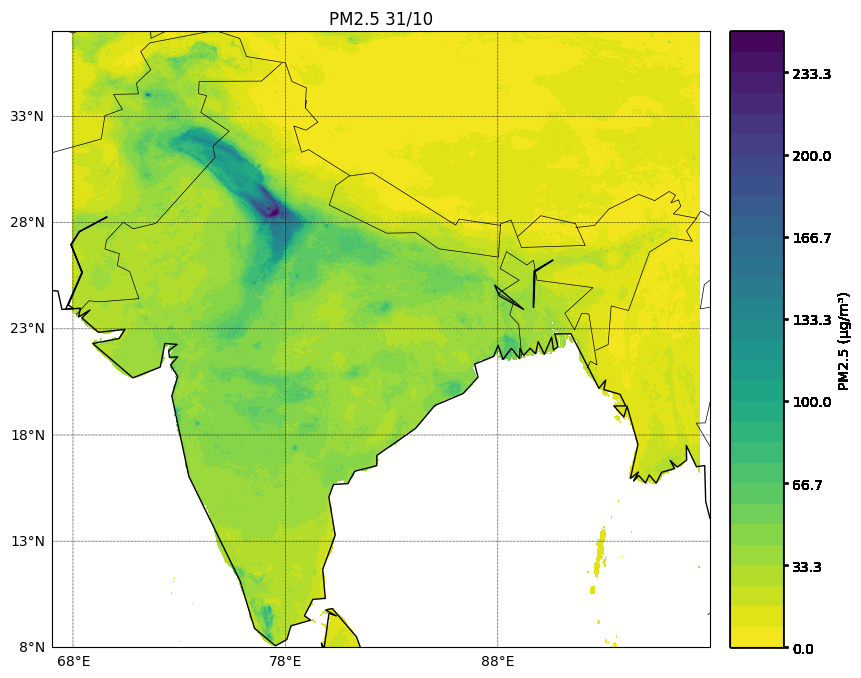

In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from mpl_toolkits.basemap import Basemap
import xarray as xr


t =0
# Function to read and plot nc4 data
def plot_nc4_data(ax, file_path, cbar=None):
    ds = xr.open_dataset(file_path)
    india_lat_min, india_lat_max = 6, 38
    india_lon_min, india_lon_max = 68, 97.5
    
    ds_india = ds.sel(lat=slice(india_lat_max, india_lat_min), lon=slice(india_lon_min, india_lon_max))
    # Assuming the dataset contains 'latitude', 'longitude', and 'PM25' variables
    wind_v = ds_india.variables['PM2.5'][:]
    wind_u_masked = np.ma.masked_outside(wind_v, 0, 250)

    # Clear the current plot
    ax.clear()

    map = Basemap(projection="cyl", resolution='c', llcrnrlat=8, urcrnrlat=37, llcrnrlon=67, urcrnrlon=98, ax=ax)
    map.drawcoastlines(color="black")
    map.drawcountries()
    lons, lats = np.meshgrid(ds_india['lon'].values, ds_india['lat'].values)
    parallels = np.arange(8, 37.6, 5)
    map.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
    meridians = np.arange(68, 98, 10)
    map.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)
    x, y = map(lons, lats)
    rain_plot = map.contourf(x, y, wind_u_masked, cmap=plt.cm.viridis_r, levels=np.linspace(0, 250, 31))

    # Remove the old colorbar if it exists
    if cbar:
        cbar.remove()
    
    # Create a new colorbar
    cbar = map.colorbar(rain_plot, "right", size="8%", pad="3%", extend='both')
    cbar.set_label("PM2.5 (µg/m³)")
    #ax.set_title("PM2.5")
    global t
    ax.set_title(f"PM2.5 {t}/10")
    t=t+1
    ax.annotate('Data - CRU TS v4.02', (-178, -88), fontsize=10)
    
    
number_strings = [f"{i:02}" for i in range(1, 32)]
# List of nc4 file paths
nc4_files = []
for i in range(0,31):
    nc4_files.append(f"C:\\Users\\Support\\Downloads\\GHAP_PM2.5_D1K_202210_V1\\GHAP_PM2.5_D1K_202210{number_strings[i]}_V1.nc")

# Create a figure and axis
fig, ax = plt.subplots()

# Initial colorbar is set to None
cbar = None

# Function to update the plot for animation
def update(frame):
    global cbar
    cbar = plot_nc4_data(ax, nc4_files[frame], cbar)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(nc4_files), repeat=False)

# Save the animation as a video file or GIF
ani.save('daily_oct.gif', writer='imagemagick', fps=1)  # Save as GIF
# ani.save('nc4_animation.mp4', writer='ffmpeg', fps=1)  # Save as MP4

plt.show()
